# Linear systems' stability: condition number of a matrix

*Arturo's solution from day 30 of setember*

When solving linear systems, roundoff will play a role. We want to investigate the accuracy of the computed solution.

A matrix $A \in \mathbb{R}^{n\times n}$ is **ill-conditioned** if relatively small changes in A (if is rounded for example) can cause large changes in the solution of $Ax = b$ (for a fixed $b \in \mathbb{R}^n $). Otherwise it is well-conditioned. For a given matrix norm $|| \cdot ||$, the **accuracy** of the solution depends on the **condition number** $k(A) = ||A || ||A^{-1}||$.

In general, we have approximations of A and b, say A + δA and b + δB, and we obtain a solution xˆ = x + δx. Recall that (backward error analysis formula):
$$
\frac{|| \delta x ||}{|| \hat{x} ||} \leq k (A) \Bigg( \frac{|| \delta A ||}{|| A ||} + \frac{|| \delta b ||}{||A|| \cdot || \hat{x} ||}  \Bigg)
$$



##  Exercise 1:

There are ill-conditioned matrices of relatively small dimensions.

*(a) Consider the Vandermonde matrix of order n*:


In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
def vandermonde(n):
    KV = np.zeros(n-2)
    for i in range(2, n):
        V_i= np.zeros((i,i))
        for j in range(0, i):
            for k in range(1, i+1):
                V_i[j,k-1] = (1-2*(k-1)/(i-1))**j
        KV[i-2] = np.linalg.norm(V_i,2)*np.linalg.norm(np.linalg.inv(V_i),2)
    return KV


In [7]:
A = vandermonde(50)
print(A)

[1.00000000e+00 3.22550493e+00 8.01156105e+00 2.35309087e+01
 6.38272826e+01 1.89814113e+02 5.35353118e+02 1.60544370e+03
 4.62644992e+03 1.39516269e+04 4.07548818e+04 1.23389738e+05
 3.63830758e+05 1.10480853e+06 3.28003166e+06 9.98312389e+06
 2.97935974e+07 9.08473095e+07 2.72240823e+08 8.31377053e+08
 2.49966296e+09 7.64316679e+09 2.30433951e+10 7.05346196e+10
 2.13143917e+11 6.53021415e+11 1.97717094e+12 6.06231538e+12
 1.83862899e+13 5.64132217e+13 1.71231474e+14 5.29500883e+14
 1.60587929e+15 4.90248874e+15 1.49449011e+16 4.86300442e+16
 1.75530374e+17 3.95907184e+17 1.76059208e+18 1.42926370e+18
 1.61202731e+18 1.89145698e+18 6.86866954e+18 7.55841797e+18
 1.30222059e+18 3.06381040e+18 5.71286162e+18 5.64013072e+19]


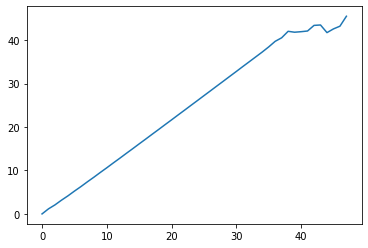

In [8]:
plt.plot(np.log(A))

We are creating the Vandermonde matrix of order i V_i and computing its condition number KV as specified. Note that the condition number grows exponentially with n. 

*(b) Let's compute now the Hilbert's matrices and calculate the condition number:*

In [13]:
def hilbert(n):
    Kh = np.zeros(n-2)
    for i in range(2, n):
        V_i= np.zeros((i,i))
        for j in range(1, i):
            for k in range(1, i):
                V_i[j,k-1] = 1/(j+k-1) #(1-2*(k-1)/(i-1))**j
        Kh[i-2] = np.linalg.norm(V_i,2)*np.linalg.norm(np.linalg.inv(V_i),2)
    return Kh


In [15]:
def hilbert(n):
    Kh = np.zeros(n-2)
    for i in range(2, n):
        V_i= np.zeros((i,i))
        for j in range(0, i):
            for k in range(0, i):
                V_i[j,k-1] = 1/(j+k+1) #(1-2*(k-1)/(i-1))**j
        Kh[i-2] = np.linalg.norm(V_i,2)*np.linalg.norm(np.linalg.inv(V_i),2)
    return Kh


In [16]:
B = hilbert(50)
print(B)

[1.92814701e+01 5.24056778e+02 1.55137387e+04 4.76607250e+05
 1.49510586e+07 4.75367357e+08 1.52575755e+10 4.93155272e+11
 1.60257675e+13 5.22061496e+14 1.67036004e+16 3.32202170e+17
 1.31308869e+17 1.64628343e+17 7.94382162e+17 9.96204607e+17
 6.93775853e+17 4.54719869e+18 5.21168586e+17 3.14090135e+18
 2.89799872e+19 9.81702865e+17 1.72735557e+18 1.39088543e+20
 7.90423323e+18 4.01238730e+18 1.40242372e+19 1.59425905e+18
 5.23799073e+18 1.41070978e+18 1.14116551e+19 5.08273286e+18
 9.58505635e+18 4.56290009e+19 2.96349907e+18 2.90306675e+19
 8.00811709e+18 2.71282088e+19 2.29573281e+18 4.42951728e+18
 3.52284363e+18 1.49112167e+19 3.34961848e+18 4.27950417e+18
 2.66433017e+18 1.51227663e+19 1.16089067e+19 4.98643777e+18]


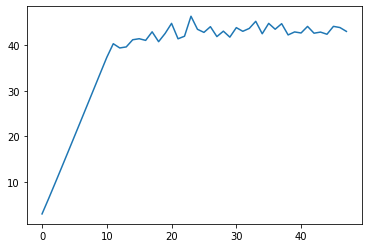

In [17]:
plt.plot(np.log(B))

## Exercise 2:

Investigate the relation between the condition number and the precision of the solution when solving a linear system.

Consider the n-dimensional Frank matrix:

In [18]:
import numpy as np

def frank(n):
    A = np.zeros((n,n))
    
    for i in range(0,n):
        for j in range(0,n):
            if (i<=j):
                A[i,j] = float(n-j)
            elif (j==i-1):
                A[i,j] = float(n-j-1)
                
    return A

In [21]:
def frank2(n):
    A=np.zeros((n,n))
    for i in range(0,n):
        for j in range(0,n):
            if j<i-1:
                A[i,j]=0
            if j==i-1:
                A[i,j]=n+1-i-1
            if j>=i:
                A[i,j]=n+1-j-1
    return A

In [22]:
A = frank(4)
print(A)
B= frank(4)
print(B)

# both functions work the same way

[[4. 3. 2. 1.]
 [3. 3. 2. 1.]
 [0. 2. 2. 1.]
 [0. 0. 1. 1.]]
[[4. 3. 2. 1.]
 [3. 3. 2. 1.]
 [0. 2. 2. 1.]
 [0. 0. 1. 1.]]


In [23]:
##MAIN
n=5
f=frank(5)
print(f)
print(np.linalg.det(f))
print(np.linalg.cond(f))
## here we can see a particular condition number for a frank matrix of order 5

[[5. 4. 3. 2. 1.]
 [4. 4. 3. 2. 1.]
 [0. 3. 3. 2. 1.]
 [0. 0. 2. 2. 1.]
 [0. 0. 0. 1. 1.]]
1.000000000000003
647.4683032841723


Assume that $A_{i,j}$ are stored as float (double
and $b = Ax_0$. Note that b contains roundoff errors of the order of the precision machine (εmachine ∼ 10−16). For n = 2, . . . , 24 compute $k_2(A)$ and compare the values of εmachinek2(A) with those of the relative error of the solution, that is
$$
\varepsilon_{rel} = \frac{|| x - x_0||_2}{|| x_0||_2}
$$

In [28]:
## Deeper study on the condition number:
def KNfrank(k):
    KF = np.zeros(k-2)
    for n in range(2, k):
        x_0 = np.zeros(n)
        for i in range(0,n):
            x_0[i]=1
        A = frank(n)
        KF[n-2] = np.linalg.norm(A,2)*np.linalg.norm(np.linalg.inv(A),2)
        b=np.dot(A,x_0)
        x=np.linalg.solve(A, b)
        e_rel=np.linalg.norm(x-x_0,2)/np.linalg.norm(x_0,2)
        print('e_rel=',e_rel)
        print('epsilon*condnumber=',(1.e-16)*KF[n-2])
    return KF, e_rel

In [29]:
Kfrank, e_frank = KNfrank(24)

e_rel= 0.0
epsilon*condnumber= 6.854101966249686e-16
e_rel= 0.0
epsilon*condnumber= 2.7579586629417513e-15
e_rel= 0.0
epsilon*condnumber= 1.2044883837224634e-14
e_rel= 1.3527237254048918e-14
epsilon*condnumber= 6.474683032841798e-14
e_rel= 1.3795925728255897e-13
epsilon*condnumber= 4.208256633444199e-13
e_rel= 2.128771309698284e-13
epsilon*condnumber= 3.191323031925279e-12
e_rel= 2.7308989463238868e-12
epsilon*condnumber= 2.756246160508992e-11
e_rel= 6.716388447542974e-11
epsilon*condnumber= 2.666577678334289e-10
e_rel= 6.254426318542695e-10
epsilon*condnumber= 2.8543218323493727e-09
e_rel= 1.85607095593548e-09
epsilon*condnumber= 3.3475208759889794e-08
e_rel= 4.402857039475857e-08
epsilon*condnumber= 4.267362221630895e-07
e_rel= 9.845017750563485e-07
epsilon*condnumber= 5.873954922042852e-06
e_rel= 2.3922906824244706e-05
epsilon*condnumber= 8.681442638295385e-05
e_rel= 4.785784652958975e-05
epsilon*condnumber= 0.0013709849536917523
e_rel= 0.0019049598042509535
epsilon*condnumber= 0.02

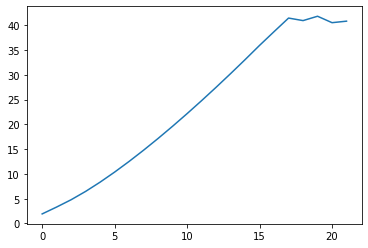

In [30]:
plt.plot(np.log(Kfrank))

### Exercise 3. 

We may discuss the problem of computing the inverse. **The worse way to solve a linear system is to compute th inverse**, since it is a very extended problem and we have to compute too many operations. 

We may compare the methods:
1. Matrix inverse method
2. LU method using GEPP

We seek to generate matrices with the condition numbers that we wish. 

In [31]:
def compare_norms(k, n):
    norm1=np.zeros(k)
    norm2=np.zeros(k)
    for p in range(0,k):
    #Generate a matrix A with K(A)=sqrt(epsilon_machine)
        A=np.zeros((n,n))
        Q=np.zeros((n,n))
        R=np.zeros((n,n))
        D=np.zeros((n,n))
        x=np.random.normal(0,1,n)
        for i in range(0,n):
            for j in range(0,n):
                A[i,j]=np.random.normal(0,1)
        Q,R=np.linalg.qr(A)
        D=np.eye(n)
        D[0,0]=9e7
        A=np.dot(np.dot(Q.T,D),Q)
        b=np.dot(A,x)
    
    #We find the solution with distinc methods
    
        A_inv=np.linalg.inv(A)
        xsol_1=np.dot(A_inv,b)
        xsol_2=np.linalg.solve(A,b)
    
    #We compute the infinit norms
    #First method
        r1=np.dot(A,xsol_1)-b
        r1=np.linalg.norm(r1,np.inf)
        valor1=np.linalg.norm(A,np.inf)*np.linalg.norm(xsol_1,np.inf) + np.linalg.norm(b,np.inf)
        res1=r1/valor1
    #Second method
        r2=np.dot(A,xsol_2)-b
        r2=np.linalg.norm(r2,np.inf)
        valor2=np.linalg.norm(A,np.inf)*np.linalg.norm(xsol_2,np.inf) + np.linalg.norm(b,np.inf)
        res2=r2/valor2
    
        norm1[p]=res1
        norm2[p]=res2
        
    return norm1, norm2

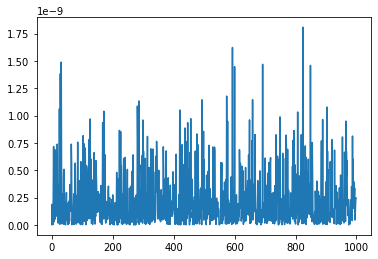

In [32]:
norm1, norm2 = compare_norms(1000, 25)

plt.plot(norm1)

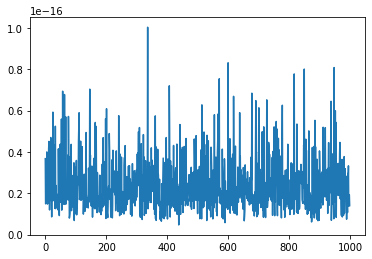

In [33]:
plt.plot(norm2)

### Exercise 4. A method to estimate the condition number 

#### Hager's 1-norm estimator

Consider the square matrix $B \in \mathbb{R}^{n\times n}$, $|| B ||_1= max_{0 \neq x \in \mathbb{R}^n} \frac{|| B x||_1}{|| x ||_1} = max_{1 \leq j \leq n} \sum_{i=1}^n |B_{ij}|$, where $\frac{|| B x||_1}{|| x ||_1}$ is called the induced norm from the norm $|| x||_1 = \sum_{j=1}^n |x_j|$. Note that this maximum is achieved for $x \in \mathbb{R}^n$ such that $||x|| = 1$. Then this norm $|| B ||_1$ is the global maximum of the function $F: \mathbb{R}^n \rightarrow \mathbb{R}$, $F(x) = || B x||_1$ over the set $S = \{ x \in \mathbb{R}^n, ||x ||_1 \leq 1 \}$, which is in fact a convex set. Then we have an optimization problem. 

We have an optimization problem, over functions that are not differentiable, such as the absolute value. However, we may differentiate anyways. Let's study how. To do so, we may move from one point $x_1 \in S$ to another point $x_2 \in S$ with $F(x_2) \geq F(x_1)$. Using the Taylor's expansion we have
$$
F(x + \Delta x ) = F(x) + DF(x) \Delta x + \mathcal{O}(\Delta^2 x),
$$
where the gradient vector is defined as follows:
$$
DF(x) = \nabla F = \Big( \frac{\partial F}{\partial x_1}, \dots, \frac{\partial F}{\partial x_n} \Big)
$$
Since $F$ is convex, we have:
$$
F(y) \geq F(x) + DF(x) (y-x),
$$
i.e. the tangent line remains under the image of the function. 

Let's consider now how to compute the gradient vector. Assume that we have the original matrix $(Bx)_j \neq 0, \forall j$, then
$$
F(x) = \sum_{i=1}^n\Big|  \underbrace{\sum_{j=1}^n B_{ij} x_j}_{(Bx)_i} \Big|
$$
Consider now $\sigma_i = sign((Bx)_i)$, then we have
$$
F(x) = \sum_{i=1}^n\Big| \sum_{j=1}^n \sigma_i B_{ij} x_j \Rightarrow \frac{\partial F}{\partial x_k} = \sum_{i=1}^n \sigma_i B_{ik} = \langle \sigma^T, B_{col(k)} \rangle \Rightarrow DF = \sigma^T B = ( B^T \sigma)^T
$$

Let's consider now the **Hager algorithm**:
- Given $x$, we compute $w = Bx, \sigma = sign(w)$, then $\nabla F = \sigma^T B = z^T$

In [1]:
## code of the Hager's algorithm (a)

In [3]:
## Arturo's code 
def hager(B,n):
    x=np.zeros(n)
    w=np.zeros(n)
    psi= np.zeros(n)
    x= np.ones(n)/n
    while True:
        w = np.dot(B,x)
        for i in range(0,n):
            if w[i]>= 0 :
                psi[i]=1
            else:
                psi[i]=-1
        z = np.dot(B.T, psi)
        nz= np.linalg.norm(z, np.inf)
        if nz <= np.dot(z,x):
            return np.linalg.norm(w,1)
        else: 
            x = np.zeros(n)
            for i in range(0,n):
                if nz == abs(z[i]):
                    x[i] = 1
                    break
        

The main idea that instead of computing the inverse of the matrix so we have $w = B^{-1} x$, we can solve the linear system $B w = x$. We are seeking for an estimate of $|| B^{-1}||_1$ without computing the inverse. Then we could compute the condition number $ k(B) = || B^{-1}||_1 || B^{-1}||_1 $ without having to compute the inverse. 

In fact we are solving two linear systems with the same matrix (but transposed) instead of computing the inverse matrix. 

In [5]:
## Arturo's code 
import numpy as np
from scipy.linalg import lu_factor
from scipy.linalg import lu_solve

def hager(B,n):
    lu, piv = lu_factor(B)
    x=np.zeros(n)
    w=np.zeros(n)
    psi= np.zeros(n)
    x= np.ones(n)/n
    while True:
        #w = np.dot(B,x)
        w = lu_solve((lu, piv), x, 0)
        print('w', w)
        for i in range(0,n):
            if w[i]>= 0 :
                psi[i]=1
            else:
                psi[i]=-1
        #z = np.dot(B.T, psi)
        z = lu_solve(( lu, piv), psi, 1)
        nz= np.linalg.norm(z, np.inf)
        if nz <= np.dot(z,x):
            return np.linalg.norm(w,1)
        else: 
            x = np.zeros(n)
            for i in range(0,n):
                if nz == abs(z[i]):
                    x[i] = 1
                    break
                
                


In [ ]:
## Per acabar